In [80]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [81]:
train=pd.read_csv('train_New.csv')
test=pd.read_csv('test_New.csv')

# Data Selection


In [82]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8119 non-null   int64  
 1   workclass       8119 non-null   object 
 2   fnlwgt          8119 non-null   int64  
 3   education       8119 non-null   object 
 4   education-num   8119 non-null   int64  
 5   marital-status  8119 non-null   object 
 6   occupation      8119 non-null   object 
 7   relationship    8119 non-null   object 
 8   race            8119 non-null   object 
 9   sex             8119 non-null   object 
 10  capital-gain    8119 non-null   int64  
 11  capital-loss    8119 non-null   int64  
 12  native-country  8119 non-null   object 
 13  income          8119 non-null   object 
 14  hours-per-week  0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 951.6+ KB


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


In [85]:
train.nunique().sort_values(ascending=False)

fnlwgt            18341
capital-gain       1256
capital-loss        209
hours-per-week       95
age                  81
native-country       41
education            16
education-num        15
occupation           14
workclass             8
marital-status        7
relationship          6
race                  5
sex                   2
income                2
dtype: int64

In [86]:
cat = train.select_dtypes(include=['object'])
cat.nunique().sort_values(ascending=False)

native-country    41
education         16
occupation        14
workclass          8
marital-status     7
relationship       6
race               5
sex                2
income             2
dtype: int64

# Outliers Detection

In [87]:
num_data_train=train.select_dtypes(include=np.number)

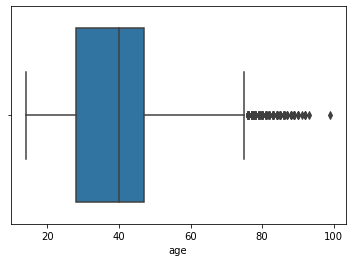

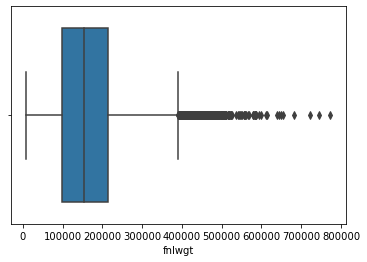

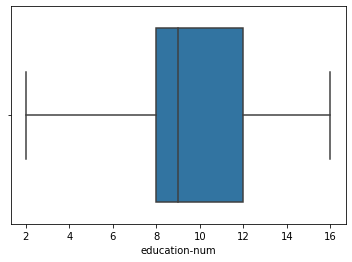

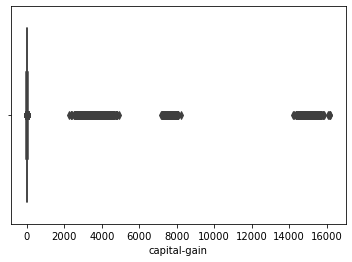

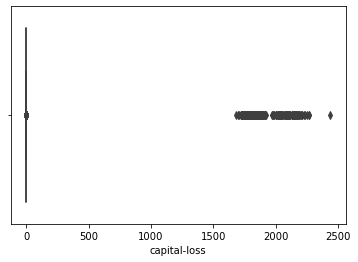

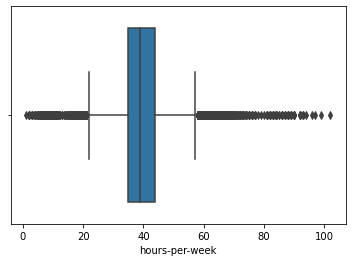

In [88]:
for i in num_data_train.columns:
    sns.boxplot(num_data_train[i])
    plt.show()
    

# Outliers Removal

In [89]:
for i in num_data_train.columns:
    q3=num_data_train[i].quantile(0.75)
    q1=num_data_train[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data_train[i].quantile(0.99)
    lc=num_data_train[i].quantile(0.01)
    for val in num_data_train[i].index:
        if num_data_train.loc[val,i]>ub:
            num_data_train.loc[val,i]=uc
        if num_data_train.loc[val,i]<lb:
            num_data_train.loc[val,i]=lc

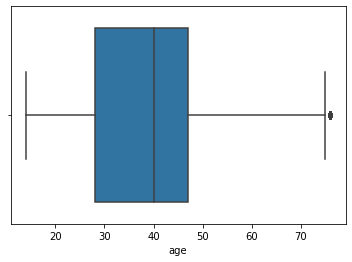

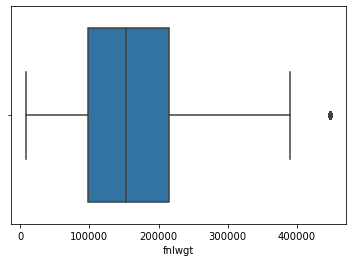

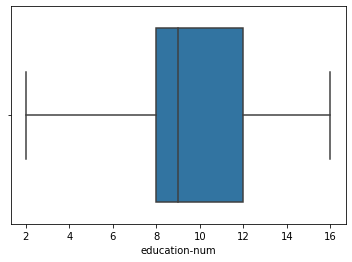

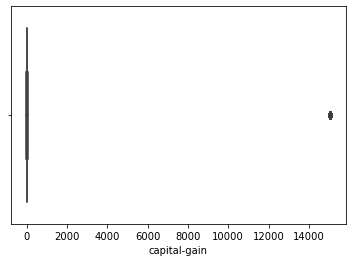

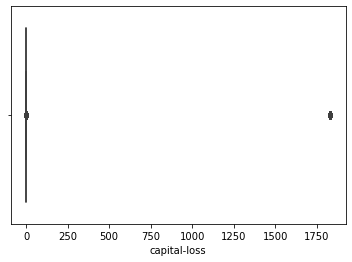

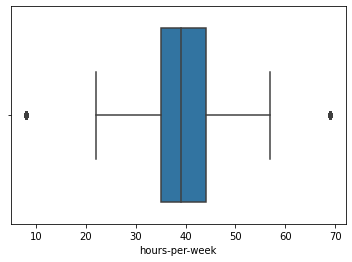

In [90]:
for i in num_data_train.columns:
    sns.boxplot(num_data_train[i])
    plt.show()

# Test File OutlierRemoval

In [91]:
num_data_test=test.select_dtypes(include=np.number)

In [92]:
for i in num_data_test.columns:
    q3=num_data_test[i].quantile(0.75)
    q1=num_data_test[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data_test[i].quantile(0.99)
    lc=num_data_test[i].quantile(0.01)
    for val in num_data_test[i].index:
        if num_data_test.loc[val,i]>ub:
            num_data_test.loc[val,i]=uc
        if num_data_test.loc[val,i]<lb:
            num_data_test.loc[val,i]=lc

In [93]:
cat_data_train=train.select_dtypes(include=np.object)
cat_data_test=test.select_dtypes(include=np.object)

In [94]:
concat_data_train = pd.concat([num_data_train,cat_data_train],axis=1)
concat_data_test = pd.concat([num_data_test,cat_data_test],axis=1)

In [95]:
concat_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             18944 non-null  float64
 1   fnlwgt          18944 non-null  float64
 2   education-num   18944 non-null  int64  
 3   capital-gain    18944 non-null  float64
 4   capital-loss    18944 non-null  float64
 5   hours-per-week  18944 non-null  float64
 6   workclass       18944 non-null  object 
 7   education       18944 non-null  object 
 8   marital-status  18944 non-null  object 
 9   occupation      18944 non-null  object 
 10  relationship    18944 non-null  object 
 11  race            18944 non-null  object 
 12  sex             18944 non-null  object 
 13  native-country  18944 non-null  object 
 14  income          18944 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.2+ MB


In [96]:
concat_data_train["hours-per-week"] = concat_data_train["hours-per-week"].astype("int64")

In [97]:
concat_data_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,52.0,98926.0,9,-3.00,0.0,44,Private,HS-grad,Never-married,Other-service,Unmarried,White,Male,United-States,<=50K
1,76.0,132607.0,12,15059.14,0.0,44,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
2,40.0,243258.0,13,19.00,0.0,57,Private,Bachelors,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,United-States,>50K
3,76.0,181259.0,12,15059.14,0.0,44,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
4,36.0,115379.0,13,12.00,0.0,69,Self-emp-inc,Masters,Divorced,Exec-managerial,Not-in-family,White,Male,United-States,<=50K


# Data Profiling

In [78]:
from pandas_profiling import ProfileReport
ProfileReport(concat_data_train,title='EDA Report')

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
concat_data_train.skew().sort_values(ascending=False)

capital-loss      4.701409
capital-gain      3.231368
fnlwgt            0.864133
age               0.353709
hours-per-week   -0.077100
education-num    -0.319246
dtype: float64

# Data Prediction

In [100]:
from pycaret.regression import *

In [103]:
concat_data_train=concat_data_train.replace({'income' : { ' <=50K' : 'less than or equal to 50K', ' >50K' :  'more than 50K' }})
concat_data_train.income.unique()

array(['less than or equal to 50K', 'more than 50K'], dtype=object)

In [105]:
for i in cat.columns.tolist():
    print(i)
    print(concat_data_train[i].value_counts()*100/len(concat_data_train))
    print()

workclass
 Private             61.760980
 Self-emp-not-inc    16.305954
 Local-gov            6.118032
 Federal-gov          5.252323
 Self-emp-inc         4.544975
 State-gov            4.323269
 Without-pay          1.361909
 Never-worked         0.332559
Name: workclass, dtype: float64

education
 HS-grad         28.832348
 Some-college    19.768792
 Bachelors       17.615076
 11th             5.278716
 Masters          4.967272
 Assoc-acdm       4.201858
 Assoc-voc        4.059333
 7th-8th          3.959037
 Prof-school      2.512669
 Doctorate        2.042863
 10th             2.037584
 5th-6th          1.683910
 9th              1.055743
 12th             0.971284
 1st-4th          0.781250
 Preschool        0.232264
Name: education, dtype: float64

marital-status
 Married-civ-spouse       43.871410
 Never-married            30.917441
 Divorced                 14.236698
 Separated                 4.075169
 Widowed                   3.293919
 Married-spouse-absent     2.433488
 Ma

In [106]:
sol= setup(data =concat_data_train, session_id=42,
             target = 'hours-per-week',
                  normalize = True, 
                  transformation = True, 
                  log_experiment = True,
                  remove_multicollinearity = True, #drop one of the two features that are highly correlated with each other
             transform_target = True,
          combine_rare_levels = True,
                    transform_target_method='yeo-johnson',
            ignore_low_variance = True,
           normalize_method='robust',
            train_size = 0.8,
            handle_unknown_categorical = True, unknown_categorical_method = 'most_frequent',
            ordinal_features = {'income' : ['less than or equal to 50K','more than 50K']},
           categorical_features = ['workclass','education','marital-status','occupation','relationship',
                       'race','sex','native-country','income'],
           numeric_features=['age','fnlwgt','education-num','capital-gain','capital-loss'],
           high_cardinality_features = ['native-country','occupation','education']
          )

,Description,Value
0,session_id,42
1,Target,hours-per-week
2,Original Data,"(18944, 15)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,9
6,Ordinal Features,True
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(15155, 34)"


2021/09/27 12:23:33 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [107]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.9850,135.8636,11.6561,0.2326,0.4117,0.3713
1,8.2929,146.9815,12.1236,0.1986,0.4139,0.3714
2,7.8997,130.3022,11.4150,0.2343,0.4068,0.3669
3,7.8142,127.8832,11.3085,0.1913,0.3955,0.3505
4,7.7824,129.3669,11.3740,0.2273,0.3921,0.3431
5,7.9923,133.6348,11.5601,0.2530,0.3918,0.3428
6,8.3622,145.3634,12.0567,0.1894,0.4366,0.4079
7,7.8688,126.8047,11.2608,0.2102,0.3918,0.3466
8,7.9356,132.4952,11.5107,0.1756,0.4176,0.3836
9,7.8271,127.7851,11.3042,0.2292,0.3934,0.3457


In [108]:
print(lightgbm)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='yeo-johnson',
                                power_transformer_standardize=True,
                                random_sta...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weigh

In [109]:
tuned_lightgbm = tune_model(lightgbm,optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.9417,133.8716,11.5703,0.2439,0.4104,0.3701
1,8.1914,143.8906,11.9954,0.2154,0.4120,0.3692
2,7.8735,130.4197,11.4201,0.2336,0.4080,0.3683
3,7.7367,125.3441,11.1957,0.2074,0.3935,0.3478
4,7.7712,128.6180,11.3410,0.2317,0.3912,0.3419
5,7.8918,131.5878,11.4712,0.2644,0.3916,0.3427
6,8.3213,144.2752,12.0115,0.1955,0.4356,0.4070
7,7.7881,125.2413,11.1911,0.2199,0.3909,0.3453
8,7.8465,129.7560,11.3910,0.1926,0.4149,0.3797
9,7.8337,127.4624,11.2899,0.2311,0.3934,0.3459


In [110]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [111]:
data_unseen=concat_data_test.replace({'income' : { ' <=50K' : 'less than or equal to 50K', ' >50K' :  'more than 50K' }})
data_unseen.income.unique()


array(['less than or equal to 50K', 'more than 50K'], dtype=object)

In [112]:
unseen_predictions = predict_model(tuned_lightgbm, data=data_unseen)
unseen_predictions.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,Label
0,40.0,106899.0,8.0,0.0,0.0,NaN,Without-pay,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,less than or equal to 50K,38.335301
1,38.0,157191.0,8.0,0.0,0.0,NaN,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Black,Male,United-States,less than or equal to 50K,40.190114
2,75.0,102547.0,10.0,32.0,0.0,NaN,Self-emp-not-inc,Some-college,Widowed,Sales,Not-in-family,Asian-Pac-Islander,Female,United-States,less than or equal to 50K,34.061456
3,38.0,44426.0,9.0,30.0,0.0,NaN,Self-emp-not-inc,HS-grad,Never-married,Sales,Unmarried,White,Male,United-States,more than 50K,44.515204
4,62.0,33230.0,9.0,-4.0,0.0,NaN,Without-pay,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,less than or equal to 50K,43.716197


In [113]:
submission=unseen_predictions[['Label']]
submission.columns = ['hours-per-week']
submission.head()

,hours-per-week
0,38.335301
1,40.190114
2,34.061456
3,44.515204
4,43.716197


In [114]:
submission.to_csv('MAPE2.csv', index=False)